In [19]:
%matplotlib inline
import numpy as np
from numpy import linalg as LA
import tensorflow as tf
import matplotlib.pyplot as plt

In [135]:
def norm(x, z):
    
    value = np.zeros(z.shape[0])
    for i in range(z.shape[0]):
        value[i] = LA.norm(x - z[i])
    
    return value

In [136]:
def K_Means_Clustering(X, k, iter_max):
    
    z = np.zeros([k, X.shape[1]])
    for i in range(k):
        z[i,:] = np.random.uniform(X.min(axis=0), X.max(axis=0), X.shape[1])
    
    for _ in range(iter_max):
        z_new = np.zeros([k, X.shape[1]])
        count = np.zeros(k)
        for i in range(X.shape[0]):
            j = np.argmin(norm(X[i,:], z))
            z_new[j,:] += X[i,:]
            count[j] += 1
        
        for j in range(k):
            if(count[j]!=0):
                z[j,:] = z_new[j,:]/count[j]
        
    y = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        y[i] = np.argmin(norm(X[i,:], z))
    
    return y, z

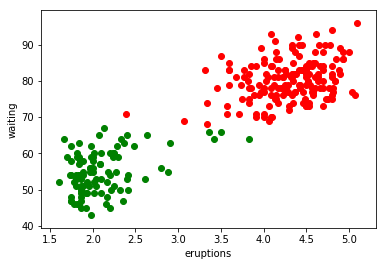

In [142]:
input_data = np.loadtxt("Old Faithful data.txt", skiprows = 1)

input_data = input_data[:,1:3]

labels, means = K_Means_Clustering(input_data, 2, 10)

for i in range(input_data.shape[0]):
    if labels[i] == 0:
        plt.scatter(input_data[i,0], input_data[i,1], color = 'r')
    else:
        plt.scatter(input_data[i,0], input_data[i,1], color = 'g')

plt.xlabel('eruptions')
plt.ylabel('waiting')
plt.show()

In [264]:
class NaiveBayes:
    def __init__(self, prior=None):
        self.prior = prior
        self.likelihood = None
    
    def train(self, data):
        self.classes = np.unique(data['labels'])
        if(self.prior == None):
            self.prior = np.sum(np.equal(data['labels'], self.classes.reshape(-1,1)), axis=1)
            self.prior = self.prior/np.sum(self.prior)
        
        self.class_mean = np.zeros([self.classes.shape[0], data['features'].shape[1]])
        self.class_stdev = np.zeros([self.classes.shape[0], data['features'].shape[1]])
        for i in range(self.classes.shape[0]):
            class_indices = np.where(data['labels'] == self.classes[i])[0]
            for j in range(data['features'].shape[1]):
                self.class_mean[i,j] = np.mean(data['features'][class_indices,j])
                self.class_stdev[i,j] = np.std(data['features'][class_indices,j])
    
    def predict(self, data):
        
        pdf = np.zeros([data.shape[0], self.classes.shape[0]])
        label = np.zeros(data.shape[0])
        for i in range(data.shape[0]):
            pdf[i,:] = self.prior
            for j in range(self.classes.shape[0]):
                for k in range(data.shape[1]):
                    pdf[i,j] *= np.exp(-(data[i,k]-self.class_mean[j,k])**2/(2*self.class_stdev[j,k]**2))/self.class_stdev[j,k]
                
            label[i] = np.argmax(pdf[i,:])
            
        return label

In [265]:
data = {'features': input_data, 'labels': labels}

clf = NaiveBayes()

clf.train(data)

In [266]:
prediction = clf.predict(input_data)

In [277]:
np.sum(prediction == labels)/np.sum(labels == labels)*100

98.16176470588235

In [273]:
gaussian_mean = np.zeros([clf.classes.shape[0], input_data.shape[1]])
gaussian_variance = np.zeros([clf.classes.shape[0], input_data.shape[1], input_data.shape[1]])
for j in range(clf.classes.shape[0]):
    class_indices = np.where(labels == clf.classes[j])[0]
    for k in range(input_data.shape[1]):
        gaussian_mean[j,k] = np.mean(input_data[class_indices,k])
    
    for k in range(input_data.shape[1]):
        gaussian_mean[j,k] = np.mean(input_data[class_indices,k])
        for l in range(input_data.shape[1]):
            gaussian_variance[j,k,l] = np.sum((input_data[class_indices,k] - gaussian_mean[j,k])*(input_data[class_indices,l] - gaussian_mean[j,l]))/len(class_indices)
            

In [274]:
gaussian_mean

array([[ 4.29793023, 80.28488372],
       [ 2.09433   , 54.75      ]])

In [276]:
gaussian_variance

array([[[ 0.17761717,  0.76310127],
        [ 0.76310127, 31.48279475]],

       [[ 0.1542787 ,  0.9856625 ],
        [ 0.9856625 , 34.4075    ]]])

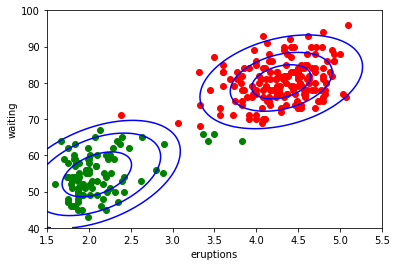

In [297]:
from scipy.stats import multivariate_normal as mvn
import matplotlib.cm as cm

cov = gaussian_variance[0,:,:]
mu = gaussian_mean[0,:]

# Generate grid points
x, y = np.meshgrid(np.linspace(3.2,5.5,100),np.linspace(60,100,100))
xy = np.column_stack([x.flat, y.flat])

# density values at the grid points
Z1 = mvn.pdf(xy, mu, cov).reshape(x.shape)

plt.contour(x, y, Z1, [0.005, 0.025, 0.05], colors='b')

cov = gaussian_variance[1,:,:]
mu = gaussian_mean[1,:]

# Generate grid points
x, y = np.meshgrid(np.linspace(1.5,3.5,100),np.linspace(40,70,100))
xy = np.column_stack([x.flat, y.flat])

# density values at the grid points
Z2 = mvn.pdf(xy, mu, cov).reshape(x.shape)

plt.contour(x, y, Z, [0.00074, 0.00075, 0.00076], colors='b')

for i in range(input_data.shape[0]):
    if labels[i] == 0:
        plt.scatter(input_data[i,0], input_data[i,1], color = 'r')
    else:
        plt.scatter(input_data[i,0], input_data[i,1], color = 'g')

plt.xlabel('eruptions')
plt.ylabel('waiting')

plt.show()